In [3]:
!pip install gdown

import gdown
import pandas as pd

file_id = '1Y5264rwV1KPyE36fMyfFxPjFL1QBj-WE'
output = '/kaggle/working/FT_combined_data.csv'

url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, output, quiet=False)

# Read the CSV file into a DataFrame
df = pd.read_csv(output)

# Display the DataFrame
print(df.info())


Downloading...
From: https://drive.google.com/uc?id=1Y5264rwV1KPyE36fMyfFxPjFL1QBj-WE
To: /kaggle/working/FT_combined_data.csv
100%|██████████| 25.5M/25.5M [00:00<00:00, 178MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   V_in          250000 non-null  float64
 1   Measured_RPM  250000 non-null  float64
 2   Vibration_1   250000 non-null  float64
 3   Vibration_2   250000 non-null  float64
 4   Vibration_3   250000 non-null  float64
 5   Target        250000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 11.4 MB
None


In [4]:
print(df.shape)

(250000, 6)


In [11]:
print(df.head())
print(df.head(-1))


      V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3  Target
0  1.54509      1.453696    -0.292070     2.254716     0.692729       0
1  1.54509      1.453696     0.224638    -2.102691    -1.919793       0
2  1.54509      1.453696    -0.585772    -1.946220    -1.288580       0
3  1.54509      1.453696     0.525003     1.828253     0.132137       0
4  1.54509      1.453696    -4.995004    -0.195169     3.100203       0
           V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3  Target
0       1.54509      1.453696    -0.292070     2.254716     0.692729       0
1       1.54509      1.453696     0.224638    -2.102691    -1.919793       0
2       1.54509      1.453696    -0.585772    -1.946220    -1.288580       0
3       1.54509      1.453696     0.525003     1.828253     0.132137       0
4       1.54509      1.453696    -4.995004    -0.195169     3.100203       0
...         ...           ...          ...          ...          ...     ...
249994 -1.28523     -1.322414

In [12]:
df.columns
df.nunique()

V_in                8
Measured_RPM       65
Vibration_1     86846
Vibration_2     91487
Vibration_3     61526
Target              5
dtype: int64

In [6]:
Label = df.iloc[:,-1]
print(Label.shape)


(250000,)


In [7]:
# Assuming the label column is named 'Label'
label_column = 'Target'
# Extract the features (all columns except the label column)
X = df.drop(label_column, axis=1)

In [8]:
print(X.shape)
print(X.head(2))
print(X.head(-1))


(25000000, 5)
       V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3
0  0.762651      0.772971    -0.415493     0.669985    -1.085369
1  0.762651      0.772971    -1.571887     0.759221     1.141696
              V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3
0         0.762651      0.772971    -0.415493     0.669985    -1.085369
1         0.762651      0.772971    -1.571887     0.759221     1.141696
2         0.762651      0.772971    -0.265763    -2.632682     0.391439
3         0.762651      0.772971     2.444142     0.564660    -0.552629
4         0.762651      0.772971    -0.763486    -0.315779     0.946284
...            ...           ...          ...          ...          ...
24999994 -0.761405     -0.738146    -0.092511    -0.133781    -0.471338
24999995 -0.761405     -0.738146    -0.190017    -0.093945    -0.464529
24999996 -0.761405     -0.738146    -0.120060     0.020543    -0.384179
24999997 -0.761405     -0.738146    -0.113715    -0.088990    -0.271144

In [9]:
print("No of NULL values in the dataset:",df.isnull().sum().sum())

No of NULL values in the dataset: 0


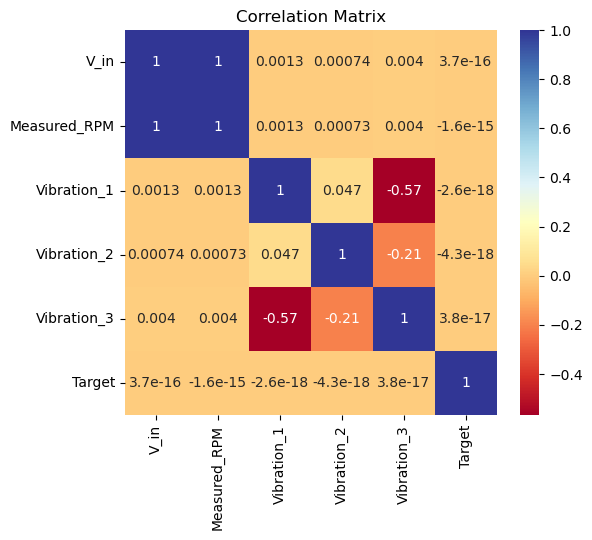

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(6,5 ))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.savefig("/kaggle/working/Correlation.pdf", bbox_inches='tight')
plt.show()

# **Machine Learning Approach**

In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into X and y
X = df[['Measured_RPM', 'Vibration_1', 'Vibration_2', 'Vibration_3']]
y = Label

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
      
# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X train:", X_train.shape)
print("Shape of Y train:", y_train.shape)
print("Shape of X test:", X_test.shape)
print("Shape of Y test:", y_test.shape)


Shape of X: (250000, 4)
Shape of y: (250000,)
Shape of X train: (200000, 4)
Shape of Y train: (200000,)
Shape of X test: (50000, 4)
Shape of Y test: (50000,)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)



Accuracy: 0.99998


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9912
           1       1.00      1.00      1.00      9938
           2       1.00      1.00      1.00     10036
           3       1.00      1.00      1.00      9914
           4       1.00      1.00      1.00     10200

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



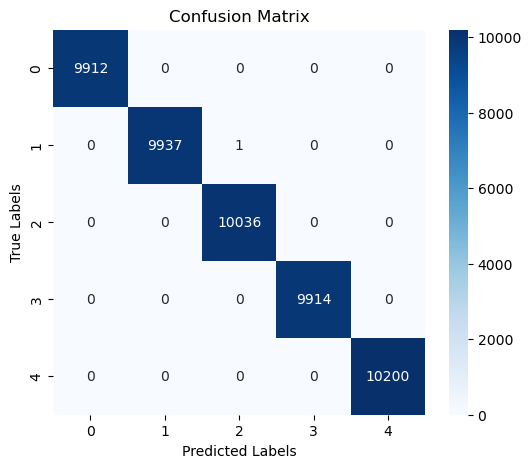

In [32]:

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("/kaggle/working/RF-CM.pdf")
plt.show()

# **Deep Learning Approach**

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense , Reshape
from tensorflow.keras.utils import to_categorical


x = X.values.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Shape of X train:", X_train.shape)
print("Shape of Y train:", y_train.shape)
print("Shape of X test:", X_test.shape)
print("Shape of Y test:", y_test.shape)


Shape of X train: (200000, 4, 1)
Shape of Y train: (200000,)
Shape of X test: (50000, 4, 1)
Shape of Y test: (50000,)


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

model = Sequential()
model.add(Conv1D(filters = 128, kernel_size = 1,strides = 1 ,input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size = 2 , strides = 2 ))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
model.summary()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
6250/6250 [==============================] - 30s 5ms/step - loss: 0.5731 - accuracy: 0.6972 - val_loss: 0.5100 - val_accuracy: 0.7187
Epoch 2/10
6250/6250 [==============================] - 29s 5ms/step - loss: 0.4532 - accuracy: 0.7547 - val_loss: 0.4252 - val_accuracy: 0.7590
Epoch 3/10
6250/6250 [==============================] - 28s 4ms/step - loss: 0.4203 - accuracy: 0.7775 - val_loss: 0.4366 - val_accuracy: 0.7427
Epoch 4/10
6250/6250 [==============================] - 29s 5ms/step - loss: 0.4019 - accuracy: 0.7888 - val_loss: 0.3793 - val_accuracy: 0.8074
Epoch 5/10
6250/6250 [==============================] - 28s 4ms/step - loss: 0.3865 - accuracy: 0.7957 - val_loss: 0.4241 - val_accuracy: 0.8063
Epoch 6/10
6250/6250 [==============================] - 29s 5ms/step - loss: 0.3824 - accuracy: 0.7980 - val_loss: 0.3711 - val_accuracy: 0.8137
Epoch 7/10
6250/6250 [==============================] - 28s 4ms/step - loss: 0.3781 - accuracy: 0.8013 - val_loss: 0.3566 - val_ac

1563/1563 [==============================] - 3s 2ms/step


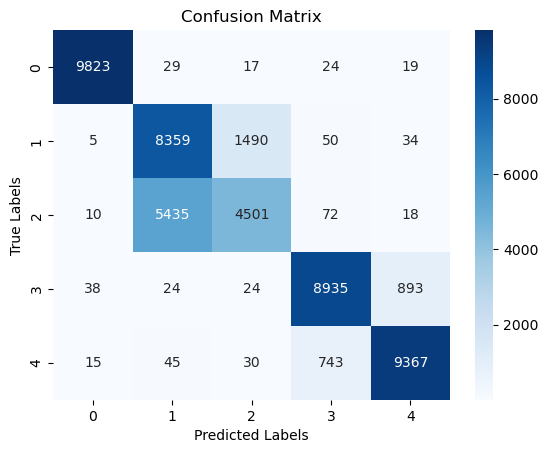

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... Model definition, training, and evaluation ...

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the plot as a PDF file
plt.savefig('CNN-CM.pdf', format='pdf')

# Show the plot
plt.show()


In [20]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.pdf', show_shapes=True, show_layer_names=True)

In [30]:
from sklearn.metrics import classification_report

# Assuming you have already trained and evaluated your CNN model
# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the classification report
report = classification_report(y_test, y_pred_labels)
print(report)


1563/1563 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9912
           1       0.60      0.84      0.70      9938
           2       0.74      0.45      0.56     10036
           3       0.91      0.90      0.91      9914
           4       0.91      0.92      0.91     10200

    accuracy                           0.82     50000
   macro avg       0.83      0.82      0.81     50000
weighted avg       0.83      0.82      0.81     50000



# **Evaluation Files**

In [40]:
!pip install gdown

import gdown
import pandas as pd

file_id = '1-3puW-ZzSUUNfRsUV3hj2ATdjO0bjYEp'
output = '/kaggle/working/E_FT_combined_data.csv'

url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, output, quiet=False)

# Read the CSV file into a DataFrame
df = pd.read_csv(output)

# Display the DataFrame
print(df.info())


Downloading...
From: https://drive.google.com/uc?id=1-3puW-ZzSUUNfRsUV3hj2ATdjO0bjYEp
To: /kaggle/working/E_FT_combined_data.csv
100%|██████████| 2.28M/2.28M [00:00<00:00, 148MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   V_in          25000 non-null  float64
 1   Measured_RPM  25000 non-null  float64
 2   Vibration_1   25000 non-null  float64
 3   Vibration_2   25000 non-null  float64
 4   Vibration_3   25000 non-null  float64
 5   Target        25000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB
None


In [42]:
df.shape

(25000, 6)

In [53]:
x1 = df.iloc[: , 1:-1]
y_true = df.iloc[:,-1]
print(x1.shape)
print(y_true.shape)

(25000, 4)
(25000,)


**Random Forest Testing**

Accuracy: 0.40376


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.37      0.39      0.38      5000
           2       0.32      0.63      0.43      5000
           3       0.50      1.00      0.67      5000
           4       0.00      0.00      0.00      5000

    accuracy                           0.40     25000
   macro avg       0.24      0.40      0.29     25000
weighted avg       0.24      0.40      0.29     25000



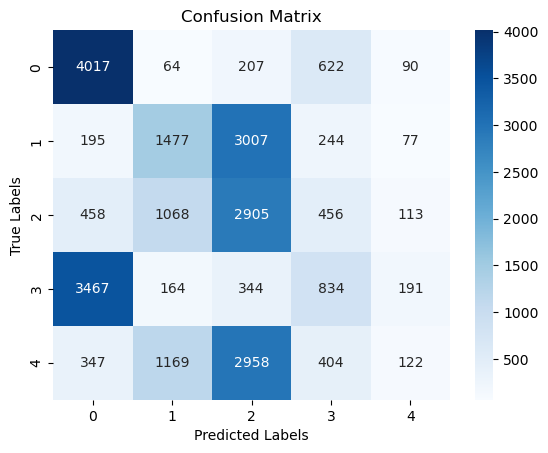

In [54]:
# Make predictions on the evaluation data
y_pred = rf_classifier.predict(x1)

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Generate the classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

**CNN Testing**

782/782 [==============================] - 2s 2ms/step


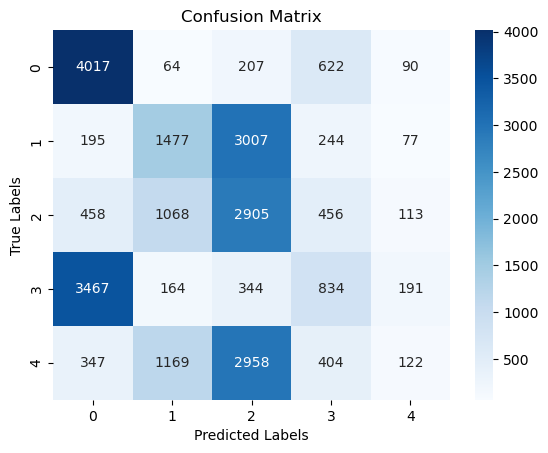

In [47]:
# Make predictions on the test data
y_pred = model.predict(x1)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the plot as a PDF file
plt.savefig('CNN-CM.pdf', format='pdf')

# Show the plot
plt.show()

In [50]:
# Calculate the classification report
report = classification_report(y_true, y_pred_classes)
print(report)


              precision    recall  f1-score   support

           0       0.47      0.80      0.60      5000
           1       0.37      0.30      0.33      5000
           2       0.31      0.58      0.40      5000
           3       0.33      0.17      0.22      5000
           4       0.21      0.02      0.04      5000

    accuracy                           0.37     25000
   macro avg       0.34      0.37      0.32     25000
weighted avg       0.34      0.37      0.32     25000



In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.3742
